**Imports**

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt

# Feature Selection
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# Regression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

**Loading Data**

In [9]:

# Load training data
X = np.genfromtxt('training.csv', 
                  delimiter=',', 
                  dtype=None,
                  skip_header = 1,
                  usecols=range(1, 3594)) # Load columns 0 to 3594 inclusive

Ca = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3595) # Load Mehlich-3 extractable Calcium data

P = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3596) # Load Mehlich-3 extractable Phosphorus data

pH = np.genfromtxt('training.csv', 
                   delimiter=',', 
                   dtype=None,
                   skip_header = 1,
                   usecols=3597) # Load pH data

SOC = np.genfromtxt('training.csv', 
                    delimiter=',', 
                    dtype=None,
                    skip_header = 1,
                    usecols=3598) # Load Soil Organic Carbon data

Sand = np.genfromtxt('training.csv', 
                     delimiter=',', 
                     dtype=None,
                     skip_header = 1,
                     usecols=3599) # Load Sand Content data

# Each record in the training data loads as a tuple.
# Convert it to a 2D array
# TODO:  There's a better way to do this somewhere.
new_X = []
for i in range(X.shape[0]):
    new_X.append(list(X[i]))
X = np.array(new_X)

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
#shuffle = np.random.permutation(np.arange(X.shape[0]))
#X, Ca, P, pH, SOC, Sand = X[shuffle], Ca[shuffle], P[shuffle], pH[shuffle], SOC[shuffle], Sand[shuffle] 

# Define the size of the dev data set
devSetSize = 200

dev_data = X[0:devSetSize]
dev_Ca_labels = Ca[0:devSetSize]
dev_P_labels = P[0:devSetSize]
dev_pH_labels = pH[0:devSetSize]
dev_SOC_labels = SOC[0:devSetSize]
dev_Sand_labels = Sand[0:devSetSize]

dev_labels = [dev_Ca_labels, dev_P_labels, dev_pH_labels, dev_SOC_labels, dev_Sand_labels]

outcome_vars = ['Ca', 'P', 'pH', 'Soc', 'Sand']

train_data = X[devSetSize:]
train_Ca_labels = Ca[devSetSize:]
train_P_labels = P[devSetSize:]
train_pH_labels = pH[devSetSize:]
train_SOC_labels = SOC[devSetSize:]
train_Sand_labels = Sand[devSetSize:]
train_labels = [train_Ca_labels, train_P_labels, train_pH_labels, train_SOC_labels, train_Sand_labels]
print(dev_Ca_labels.shape)
print(train_Ca_labels.shape)


print('Number of features:', dev_data.shape[1])
print('Number of training examples:', train_data.shape[0])
print('Number of dev examples:', dev_data.shape[0])

#TODO: Dev / Train data have 2 string columns, the first and the last. 
#The first is an ID, and the last is a categorical with 2 possible values apparently. 
#Encode / transform these so they are useful

# Load test data
test_x = np.genfromtxt('sorted_test.csv', 
                                delimiter=',', 
                                dtype=None,
                                skip_header = 1,
                                usecols=range(0, 3595)) # Load columns 0 to 3594 inclusive

new_test_x = []
for i in range(test_x.shape[0]):
    new_test_x.append(list(test_x[i]))
test_x = np.array(new_test_x)


print('Number of test examples:', test_x.shape[0])




 (200L,)
(957L,)
('Number of features:', 3593L)
('Number of training examples:', 957L)
('Number of dev examples:', 200L)
('Number of test examples:', 727L)


In [12]:
# K Nearest Neighbors
n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors)

for i in range(3593):

    # In order to pull just one feature (column) and use it, we have to use the reshape function. 
    train_data_i = train_data[:,i].reshape(-1,1)
    dev_data_i = dev_data[:,i].reshape(-1,1)

    knn.fit(train_data_i, train_Ca_labels)
    rs = knn.score(dev_data_i,dev_Ca_labels)
    if rs > 0:
        print('column %5i :, R-squared: %3.3f' %(i,rs))



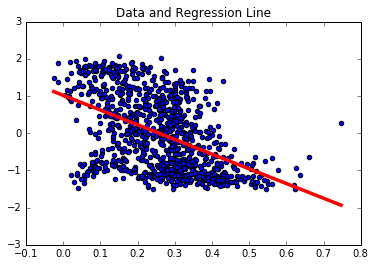

In [13]:
# Linear Regression
lm = LinearRegression()
        
def PlotUnivariateFitAndResids(X, Y, preds, preds_sorted):
    plt.subplot(1, 1, 1)
    plt.scatter(np.ravel(X), Y)
    plt.plot(np.sort(X, 0), preds_sorted, 'r', linewidth=3.5)
    plt.title("Data and Regression Line")

    #plt.subplot(1, 2, 2)
    #resid = np.ravel(Y) - preds
    #plt.scatter(X, resid)
    #plt.title("Residual Plot")

    plt.show()

## fit linear regression model
def LinearRegressionFitAndPlot(X, Y):
    lm = LinearRegression()
    lm.fit(X, Y)
    preds = lm.predict(X)
    preds_sorted = lm.predict(np.sort(X, 0))#

    PlotUnivariateFitAndResids(X, Y, preds, preds_sorted)

    
my_col = 200

train_data_i = train_data[:,my_col].reshape(-1,1)
dev_data_i = dev_data[:,my_col].reshape(-1,1)

        
LinearRegressionFitAndPlot(train_data_i, train_Sand_labels)

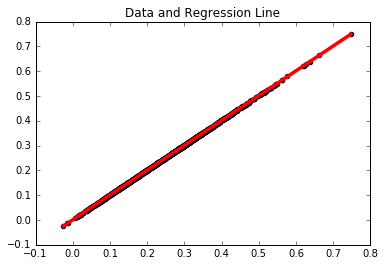

In [14]:
# Show that each column is almost perfectly colinear
my_col = 200
my_colp1 = my_col + 1

train_data_i = train_data[:,my_col].reshape(-1,1)
train_data_ip1 = train_data[:,my_colp1].reshape(-1,1)

        
LinearRegressionFitAndPlot(train_data_i, train_data_ip1)


#from statsmodels.regression.quantile_regression import QuantReg 
#from mpl_toolkits.mplot3d import Axes3D

#train_data_i   = train_data[:,0].reshape(-1,1)
#train_data_ip1 = train_data[:,3500].reshape(-1,1)
#dev_data_i = dev_data[:,].reshape(-1,1)

#plt.subplot(1,1,1)
#plt.scatter(train_data_i,train_data_ip1)

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(train_data_i,train_data_ip1,train_Ca_labels)


#plt.subplot(1, 2, 1) 

#plt.scatter(np.ravel(X), Y)
#plt.plot(np.sort(X, 0), preds_sorted, 'r', linewidth=3.5)
#plt.title("Data and Regression Line")

#plt.subplot(1, 2, 2)
#resid = np.ravel(Y) - preds
#plt.scatter(X, resid)
#plt.title("Residual Plot")

#plt.show()

**Feature selectors**

In [22]:

def getFeatureSelectors():
     return [
        ['kbest100', SelectKBest(k=100)],
        ['kbest250', SelectKBest(k=250)],
        ['pca5', PCA(n_components=5)],
        ['pca10', PCA(n_components=10)],
        ['pca20', PCA(n_components=20)],
        ['pca50', PCA(n_components=50)],
        ['pca100', PCA(n_components=100)],
        ['pca100kbest100', FeatureUnion([("pca100", PCA(n_components=100)), ("kbest100", SelectKBest(k=100))])]
     ]


**Classifiers**

In [24]:

def getClassifiers():
     return [
        ['KNN', KNeighborsRegressor(), {'n_neighbors':[1, 2, 3, 5, 8]}],
        ['SVR', SVR(), {'kernel':['linear', 'sigmoid'], 'C':[0.5, 2, 13, 34, 100], 'epsilon':[0.01, 0.05, 0.25], 'shrinking':[True, False]}],
        ['Lasso', Lasso(), {'alpha':[0.01, 0.05, 0.25, 0.9]}],
        ['RandomForest', RandomForestRegressor(), {'n_estimators':[1, 2, 3, 5, 8]}]
    ]


**Test combinations of selectors and classifiers**

In [ ]:


# For each outcome variable, for each classifier and for each selector, it will obtain and print 
# the best hyperparameters and inmediately print the mean squared error.
# Finally, after finishing the calculations, it will print the methods and score ordered by score (MSE)
# To see what would be the final score we'd get, you can get the best MSE score for each outcome variable,
# and calculate the average of them.
def run():
    
    results = []
    
    for outcomeVarIndex in range(0, 5):
        print '*************************************************************'
        print 'Outcome Variable:', outcome_vars[outcomeVarIndex]
        print '*************************************************************'

        for selector in getFeatureSelectors():
            for classifier in getClassifiers():

                print '-------------------------------------------------------'
                print selector[0] + ' ' + classifier[0]

                selectedTrainData = selector[1].fit(train_data, train_labels[outcomeVarIndex]).transform(train_data)
                selectedDevData = selector[1].transform(dev_data)

                grid_search = GridSearchCV(classifier[1], param_grid=classifier[2])

                grid_search.fit(selectedTrainData, train_labels[outcomeVarIndex])
                print(grid_search.best_estimator_)

                meanSquaredError = 0.0
                for i in range(len(selectedDevData)):
                    diff = grid_search.predict(selectedDevData[i].reshape(1, -1)) - dev_labels[outcomeVarIndex][i]
                    squaredDiff = diff ** 2
                    meanSquaredError = meanSquaredError + squaredDiff
                    
                meanSquaredError = meanSquaredError / float(len(selectedDevData))
                
                print 'Mean Squared Error: ', str(meanSquaredError)
                print 'Score: ' + str(grid_search.score(selectedDevData, dev_labels[outcomeVarIndex]))
                
                results.append([selector[0], classifier[0], meanSquaredError])

                                                            
    sortedResults = sorted(results, key=lambda result: result[2], reverse=True)
    for result in sortedResults:
        print 'Selector: ' + result[0] + ', Classifier: ' + result[1]  + ', MeanSquaredError: ' + result[2]
                                                            
run()

*************************************************************
Outcome Variable: Ca
*************************************************************
-------------------------------------------------------
kbest100 KNN
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')
Mean Squared Error:  [ 0.40083759]
Score: -8.36203004946
-------------------------------------------------------
kbest100 SVR
